# Figures for the Report and Presentation



Primarily from the [NOIRLab API examples](https://github.com/NOAO/nat-nb/blob/master/sia.ipynb)

In [2]:
import matplotlib.pyplot as plt
from astropy.io import fits as fits
from astropy.wcs import WCS
from astropy.utils import data as data_utils
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from astropy.coordinates import (SkyCoord, Distance, Galactic, 
                                 EarthLocation, AltAz)
import astropy.coordinates as coord
import astropy.units as u

# version dependencies are currently an issue
import pkg_resources
pkg_resources.require("numpy==1.26.3")
import numpy as np

# import json
# import requests
from dl import authClient as ac, queryClient as qc
import pandas as pd

## FIGURE 1: Sky Coverage (Overlay the 2.3m sky coverage with the DR10 Legacy Survey)

Query All Bricks From the LS_DR10 Bricks_s Auxiliary Table

In [3]:
query = f""" 
        SELECT brickname, ra,dec
        FROM ls_dr10.bricks_s
        WHERE nexp_g >= 1
        """
all_bricks= qc.query(sql=query,fmt="pandas")

Query All Bricks with No observations in the g Filter

In [4]:
# get all the brick names and ra/dec of every brick with NO observations in the g filter

query = f"""
        SELECT brickname, ra, ra1, ra2, dec, dec1, dec2, nexp_g, nexp_i, nexp_r, nexp_z, wise_nobs_1, wise_nobs_2, wise_nobs_3, wise_nobs_4
        FROM ls_dr10.bricks_s
        WHERE nexp_g<1
        """

non_g_bricks = qc.query(sql=query, fmt="pandas")


In [5]:
# bricks with r band observations
r_bricks = non_g_bricks[non_g_bricks['nexp_r']!=0]
# no r band, but i band
i_bricks = non_g_bricks[(non_g_bricks['nexp_r']==0) & (non_g_bricks['nexp_i']!=0)]
# no r or i bands, but z band
z_bricks = non_g_bricks[(non_g_bricks['nexp_r']==0) & (non_g_bricks['nexp_i']==0) & (non_g_bricks['nexp_z']!=0)]
# no r, i, or z
wise_only = non_g_bricks[(non_g_bricks['nexp_r']==0) & (non_g_bricks['nexp_i']==0) & (non_g_bricks['nexp_z']==0)]

Almost all of the DR10 bricks have at least one g-band observation associated with them, and those that don't are mostly along the edge of the Milky Way plane and the Magellanic Clouds. Out of the ~16k bricks that aren't accounted for in the g-band, only about 2900 only have WISE (W1, W2, W3, W4) observations that would require different calibration and image processing to handle.

Difference Between Plotting All the Bricks and Plotting the Bricks by Filter 

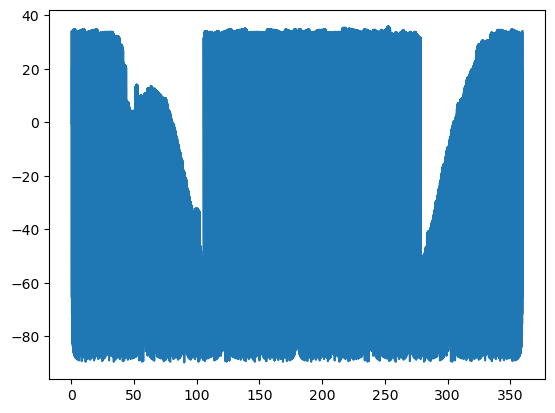

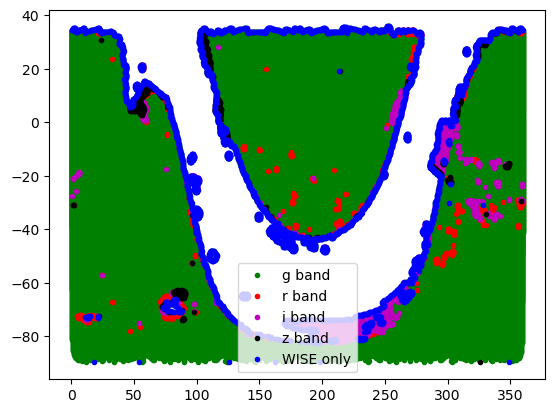

In [6]:
#fig, (ax1,ax2) = plt.subplots(1,2)
plt.figure()
plt.plot(all_bricks['ra'], all_bricks['dec'])
plt.figure()
plt.plot(all_bricks['ra'], all_bricks['dec'],'g.', label="g band")
# ax.plot(non_g_bricks['ra'], non_g_bricks['dec'], 'b.', label="non g band")
plt.plot(r_bricks['ra'], r_bricks['dec'], 'r.', label="r band")
plt.plot(i_bricks['ra'], i_bricks['dec'], 'm.', label="i band")
plt.plot(z_bricks['ra'], z_bricks['dec'], 'k.', label="z band")
plt.plot(wise_only['ra'], wise_only['dec'], 'b.', label="WISE only")
plt.legend()
plt.show()

## Previous Figure 1

Option 1

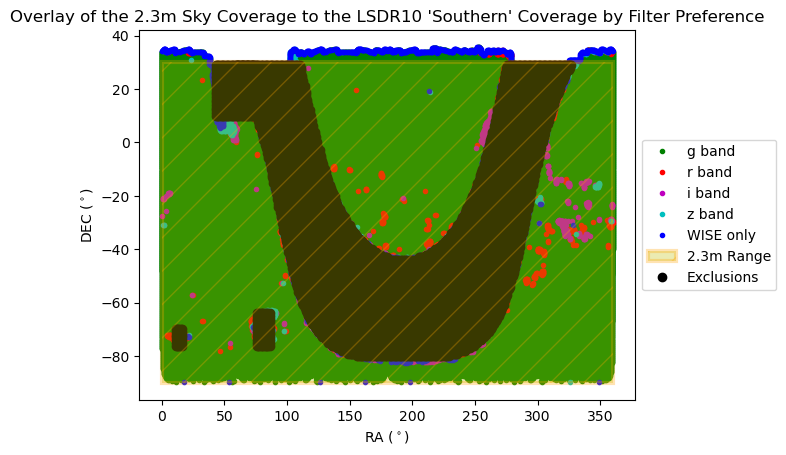

In [21]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(1,1)
ax.plot(all_bricks['ra'], all_bricks['dec'], 'g.') #label="g band")
# ax.plot(non_g_bricks['ra'], non_g_bricks['dec'], 'b.', label="non g band")
ax.plot(r_bricks['ra'], r_bricks['dec'], 'r.') #label="r band")
ax.plot(i_bricks['ra'], i_bricks['dec'], 'm.')# label="i band")
ax.plot(z_bricks['ra'], z_bricks['dec'], 'c.') #label="z band")
ax.plot(wise_only['ra'], wise_only['dec'], 'b.')#label="WISE only")
#fig.patches.extend([plt.Rectangle((0,-90),360,120,facecolor='y',alpha=0.3,hatch='/',linewidth=2,transform=fig.transFigure, figure=fig)])
plt.gca().add_patch(Rectangle((0,-90),360,120,
                                  fill=True,facecolor='y',hatch='/', alpha=0.3, edgecolor='orange',linewidth=3, zorder=100,
                                figure=fig)) #label="2.3m Range"))
ax.set(title="Overlay of the 2.3m Sky Coverage to the LSDR10 'Southern' Coverage by Filter Preference", xlabel="RA ($^\circ$)", ylabel="DEC ($^\circ$)")
#Highlighting the exclusion of the galactic plane b<|18|
for ra_b in range(10,330):
    for dec_b in range(-80,30):
      coord_radec=SkyCoord(ra=ra_b, dec=dec_b, frame='icrs', unit='degree')
      coord_gal=coord_radec.galactic
      if abs(coord_gal.b.value)<=19:
        ax.plot(ra_b,dec_b,'ko') #label='Exclusions')
      # Highlight LMC
      if (ra_b >=76) and (ra_b <= 86) and (dec_b >= -76) and (dec_b <= -64):
        ax.plot(ra_b,dec_b,'ko')
      # Highlight SMC
      if (ra_b >=11) and (ra_b <= 16) and (dec_b >= -76) and (dec_b <= -70):
        ax.plot(ra_b,dec_b,'ko')
      #Exclude the gap near the galactic plane
      if (ra_b >=43) and (ra_b <= 75) and (dec_b >= 10) and (dec_b <= 30):
        ax.plot(ra_b,dec_b,'ko')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(['g band', 'r band','i band','z band', 'WISE only','2.3m Range', 'Exclusions'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Plot of Excluded Areas

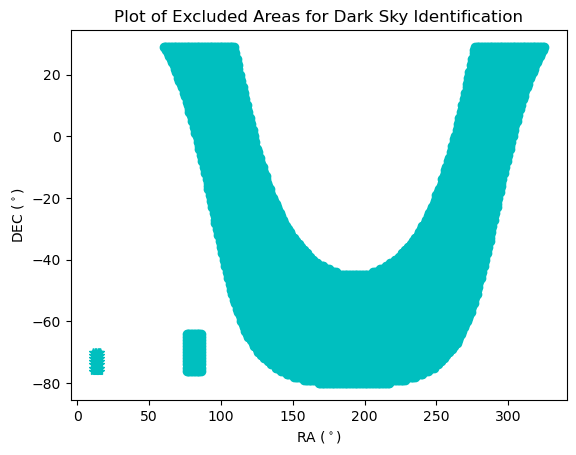

In [11]:
fig, ax = plt.subplots(1,1)
#Highlighting the exclusion of the galactic plane b<|18|
for ra_b in range(10,330):
    for dec_b in range(-80,30):
      coord_radec=SkyCoord(ra=ra_b, dec=dec_b, frame='icrs', unit='degree')
      coord_gal=coord_radec.galactic
      if abs(coord_gal.b.value)<=18:
        #print(abs(coord_gal.b.value))
        ax.plot(ra_b,dec_b,'co', label='Galactic Plane')
      # check if in LMC
      if (ra_b >=76) and (ra_b <= 86) and (dec_b >= -76) and (dec_b <= -64):
        ax.plot(ra_b,dec_b,'co', label='LMC')
      # check if in SMC
      if (ra_b >=11) and (ra_b <= 16) and (dec_b >= -76) and (dec_b <= -70):
        ax.plot(ra_b,dec_b,'c*', label='SMC')
ax.set(title="Plot of Excluded Areas for Dark Sky Identification", xlabel="RA ($^\circ$)", ylabel="DEC ($^\circ$)")
plt.show()

Option 2

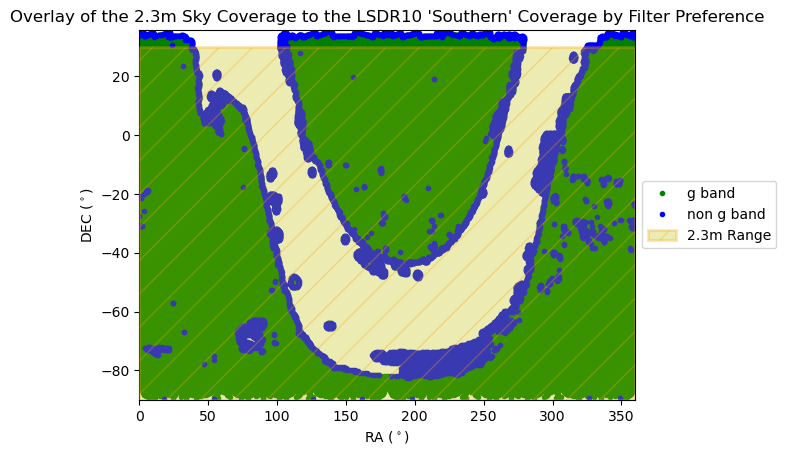

In [18]:
from matplotlib.patches import Rectangle, Circle, CirclePolygon, Wedge
fig, ax = plt.subplots(1,1)
ax.plot(all_bricks['ra'], all_bricks['dec'], 'g.', label="g band")
ax.plot(non_g_bricks['ra'], non_g_bricks['dec'], 'b.', label="non g band")
#ax.plot(r_bricks['ra'], r_bricks['dec'], 'r.', label="r band")
#ax.plot(i_bricks['ra'], i_bricks['dec'], 'm.', label="i band")
#ax.plot(z_bricks['ra'], z_bricks['dec'], 'k.', label="z band")
#ax.plot(wise_only['ra'], wise_only['dec'], 'b.', label="WISE only")
plt.gca().add_patch(Rectangle((0,-90),360,120,
                                  fill=True,facecolor='y',hatch='/', alpha=0.3, edgecolor='orange',linewidth=2, zorder=100,
                                figure=fig, label="2.3m Range"))
#fig.patches.extend([plt.Rectangle((0,-90),360,120,facecolor='y',alpha=0.3,hatch='/',linewidth=2,transform=fig.transFigure, figure=fig)])
ax.set(title="Overlay of the 2.3m Sky Coverage to the LSDR10 'Southern' Coverage by Filter Preference", xlabel="RA ($^\circ$)", ylabel="DEC ($^\circ$)")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.margins(0)
plt.show()

Aitoff Projection

Text(0, 0.5, 'Dec[deg]')

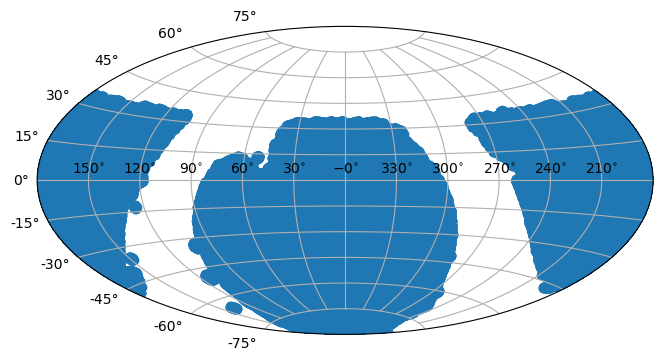

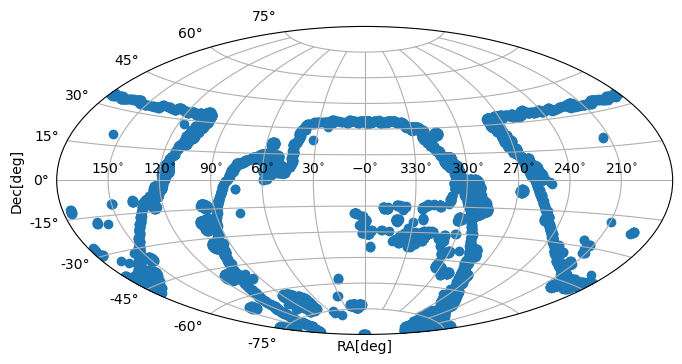

In [9]:
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from astropy.coordinates import (SkyCoord, Distance, Galactic, 
                                 EarthLocation, AltAz)
import astropy.coordinates as coord
import astropy.units as u
g_band=SkyCoord(ra=all_bricks["ra"],dec=all_bricks["dec"],frame='icrs',unit=u.degree)
non_g_band=SkyCoord(ra=non_g_bricks["ra"],dec=non_g_bricks["dec"],frame='icrs',unit=u.degree)
def coordinates_aitoff_plot(coords):
    fig, ax = plt.subplots(figsize=(10, 4), 
                           subplot_kw=dict(projection="aitoff"))
    
    sph = coords.spherical
    cs = ax.scatter(-sph.lon.wrap_at(180*u.deg).radian,
                    sph.lat.radian)

    def fmt_func(x, pos):
        val = coord.Angle(-x*u.radian).wrap_at(360*u.deg).degree
        return f'${val:.0f}' + r'^{\circ}$'

    ticker = mpl.ticker.FuncFormatter(fmt_func)
    ax.xaxis.set_major_formatter(ticker)

    ax.grid()
    
    return fig, ax
fig,ax=coordinates_aitoff_plot(g_band)
fig,ax=coordinates_aitoff_plot(non_g_band)

ax.set_xlabel('RA[deg]')
ax.set_ylabel('Dec[deg]')

## FINAL Aitoff Projection

<function matplotlib.pyplot.show(close=None, block=None)>

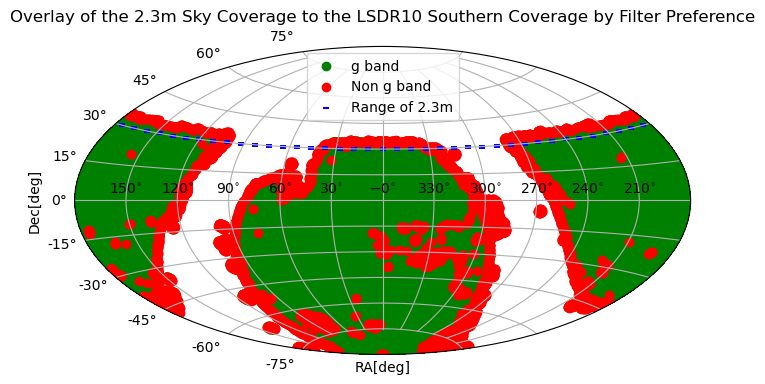

In [19]:
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from astropy.coordinates import (SkyCoord, Distance, Galactic, 
                                 EarthLocation, AltAz)
import astropy.coordinates as coord
import astropy.units as u
g_band=SkyCoord(ra=all_bricks["ra"],dec=all_bricks["dec"],frame='icrs',unit=u.degree)
non_g_band=SkyCoord(ra=non_g_bricks["ra"],dec=non_g_bricks["dec"],frame='icrs',unit=u.degree)
range_23=SkyCoord(ra=np.linspace(0,360,40),dec=np.array(40*[30]),frame='icrs',unit=u.degree)
#Reference:'https://learn.astropy.org/tutorials/2-Coordinates-Transforms#Coordinate-Representations'
fig, ax = plt.subplots(figsize=(10, 4), 
        subplot_kw=dict(projection="aitoff"))
sph = g_band.spherical
cs = ax.scatter(-sph.lon.wrap_at(180*u.deg).radian,
                sph.lat.radian, color='g', label="g band")
def fmt_func(x, pos):
        val = coord.Angle(-x*u.radian).wrap_at(360*u.deg).degree
        return f'${val:.0f}' + r'^{\circ}$'
ticker = mpl.ticker.FuncFormatter(fmt_func)
ax.xaxis.set_major_formatter(ticker)
sph1 = non_g_band.spherical
cs1 = ax.scatter(-sph1.lon.wrap_at(180*u.deg).radian,
                sph1.lat.radian,color='r', label="Non g band")
sph2=range_23.spherical
cs2=ax.scatter(-sph2.lon.wrap_at(180*u.deg).radian,
                sph2.lat.radian,color='b',marker='_',s=15, label="Range of 2.3m")
#print(sph1.lat.degree)
#print(sph1.lon.radian)
plt.title(label='Overlay of the 2.3m Sky Coverage to the LSDR10 Southern Coverage by Filter Preference', fontweight=10, pad='18.0')
ax.set_xlabel('RA[deg]')
ax.set_ylabel('Dec[deg]')
ax.legend()
ax.grid()
#plt.fill_between(30, -90, color='y',aplha=0.5)
#point1=[180,30]
#p1=point1.spherical
#point2=[270,30]
#p2=point2.spherical
#plt.plot(point1,'k')
#wedge=Wedge((30, 10), 21, 180, 360, width=12, color='y',alpha=0.3)
#ax.add_artist(wedge)
#plt.gca().add_patch(Rectangle((0*u.deg,0*u.deg),300*u.deg,100*u.deg,
                                #fill=True,facecolor='y',hatch='/', alpha=0.3, edgecolor='orange',linewidth=2, zorder=100,
                                #figure=fig, label="2.3m Range"))
plt.show
    

Extras

In [ ]:
#fig, ax = plt.subplots(1,1)
#wedge=Wedge((.3, .3), 0.12, 200, 360, width=0.10)
#ax.add_artist(wedge)
#plt.show
def hanging_line(point1, point2):
    a = (point2[1] - point1[1])/(np.cosh(point2[0]) - np.cosh(point1[0]))
    b = point1[1] - a*np.cosh(point1[0])
    x = np.linspace(point1[0], point2[0], 100)
    y = a*np.cosh(x) + b

    return (x,y)

point1=[180,30]
point2=[270,30]
x,y = hanging_line(point1, point2)

plt.plot(x,y)

## FIGURE 2: Electromagnetic Range of the 2.3m to the DES Filters

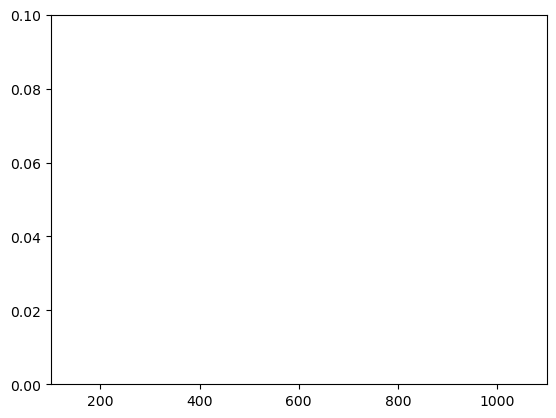

In [ ]:
plt.figure()
#Fits file for DES bandpasses can be found at https://noirlab.edu/science/programs/ctio/filters/Dark-Energy-Camera
#Wifes is 320-980nm
#g_band is 398-548nm
#r_band is 568-716
#i-band is 710-857
#z-band is 850-1002

## FIGURE 3: Plot that Compares SE Findings to Tractor Objects in that Area

Going to use a 0.25*0.25 Brick (0001m002)

Getting Image of Brick from Legacy Survey

In [144]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from scipy.ndimage import distance_transform_edt
from astropy.visualization import (MinMaxInterval, ImageNormalize)
from astropy.io import fits as fits
from astropy.wcs import WCS
from astropy.utils import data as data_utils
from astropy.coordinates import SkyCoord
from astropy.nddata import bitmask

import sep
sep.set_extract_pixstack(1000000)

# version dependencies are currently an issue
import pkg_resources
pkg_resources.require("numpy==1.26.3")
import numpy as np
from dl import authClient as ac, queryClient as qc
import pandas as pd

In [145]:
def obtain_image(brick, filter="g", reset_cache=True, return_bitmask=False):
    """Returns the header and data for a coadded FITS file queried from the Legacy Survey DR10 portal
    
    Files are accessed with a url pattern of `<section>/<brick>/legacysurvey-<brick>-image-<filter>.fits.fz`
    as documented on the [Legacy Survey website](https://www.legacysurvey.org/dr10/files/#image-stacks-south-coadd).
    Images can be deleted from cache after the header and data are extracted.
    
    Parameters
    ----------
    brick:  `str`
        Brick name of image: RRRr(p/m)DDd
    filter: `str`
        Photographic filter of image to request (g, r, i, z)
    reset_cache: `bool`, default `True`
        Clears the downloaded image from the cache
    return_bitmask: `bool`, default `True`
        Downloads and returns corresponding bitmask associated with image stack
        
    Returns
    -------
    header: `CompImageHeader`
        Astropy object of the FITS header data
    data: `ndarray`
        Numpy NDarray of FITS image data
    bitmask_header: `CompImageHeader`
        (Optional, `return_bitmask=True`) Astropy object of the bitmask header data
    bitmask_data: `ndarray`
        (Optional, `return_bitmask=True`) Numpy NDarray of bitmask data
    """
    
    url = "https://portal.nersc.gov/cfs/cosmo/data/legacysurvey/dr10/south/coadd/"
    image_string = url + f"{brick[0:3]}/{brick}/legacysurvey-{brick}-image-{filter}.fits.fz"
    bitmask_string = url + f"{brick[0:3]}/{brick}/legacysurvey-{brick}-maskbits.fits.fz"
    
    
    print(f"Downloading Image: {image_string}....")

    # assumes only one image, in the first non-primary header file
    with fits.open(image_string) as hdu:
        img_header = hdu[1].header
        img_data = hdu[1].data
    
    # download corresponding MASKBITS bitmask as well
    if return_bitmask:
        print(f"Downloading Bitmask: {bitmask_string}....")
        with fits.open(bitmask_string) as hdu:
            # print(hdu.info())
            # bitmask = hdu
            bitmask_header = hdu[1].header
            bitmask_data = hdu[1].data
    
    if reset_cache:
        print("Clearing download cache...")
        data_utils.clear_download_cache(image_string)
        data_utils.clear_download_cache(bitmask_string)
    
    if return_bitmask:
        return img_header, img_data, bitmask_header, bitmask_data
    
    return img_header, img_data

header, data, bitmask_header, bitmask_data = obtain_image("0001m002", "g", reset_cache=False, return_bitmask=True)

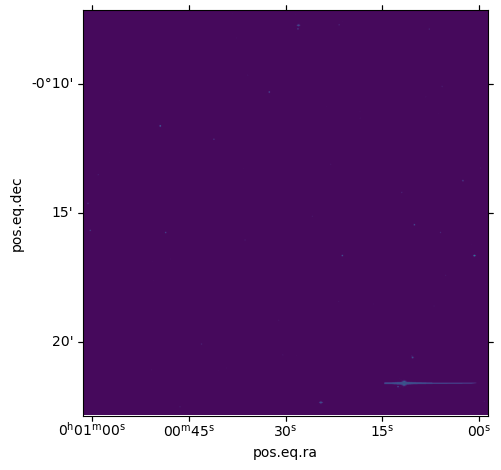

In [174]:
def plot_image():
    """Plots the image based on header and image data"""
    
    wcs = WCS(header)
    ra = header['CRVAL1']
    dec = header['CRVAL2']

    plt.figure()
    ax = plt.subplot(111, projection=wcs)
    ax.imshow(data, norm='linear')

    plt.tight_layout()

    return wcs, ra, dec
    
wcs, ra, dec = plot_image()

In [146]:
def find_bad_pixels(flags=[1,2,11,12,13]):
    """Returns an array of the same shape of the bitmask with 1's where 'bad pixels' are located
    
    Flags should be integers from 0 to 15. Relevant flags for LSDR10 from [MASKBITS](https://www.legacysurvey.org/dr10/bitmasks/):
    0  = 'NPRIMARY'           / maskbits bit 0 (0x1): not primary brick area   
    1  = 'BRIGHT  '           / maskbits bit 1 (0x2): bright star nearby       
    2  = 'SATUR_G '           / maskbits bit 2 (0x4): g band saturated         
    3  = 'SATUR_R '           / maskbits bit 3 (0x8): r band saturated         
    4  = 'SATUR_Z '           / maskbits bit 4 (0x10): z band saturated        
    5  = 'ALLMASK_G'          / maskbits bit 5 (0x20): any ALLMASK_G bit set   
    6  = 'ALLMASK_R'          / maskbits bit 6 (0x40): any ALLMASK_R bit set   
    7  = 'ALLMASK_Z'          / maskbits bit 7 (0x80): any ALLMASK_Z bit set   
    8  = 'WISEM1  '           / maskbits bit 8 (0x100): WISE W1 (all masks)    
    9  = 'WISEM2  '           / maskbits bit 9 (0x200): WISE W2 (all masks)    
    10 = 'BAILOUT '           / maskbits bit 10 (0x400): Bailed out processing 
    11 = 'MEDIUM  '           / maskbits bit 11 (0x800): medium-bright star    
    12 = 'GALAXY  '           / maskbits bit 12 (0x1000): SGA large galaxy     
    13 = 'CLUSTER '           / maskbits bit 13 (0x2000): Globular cluster     
    14 = 'SATUR_I '           / maskbits bit 14 (0x4000): i band saturated     
    15 = 'ALLMASK_I'          / maskbits bit 15 (0x8000): any ALLMASK_I bit set
    """
    
    print(f"Flags to mask: {flags}")
    ok_flags = 2**np.arange(0,16)
    ok_flags = np.delete(ok_flags, flags)
    
    bad_pix = bitmask.bitfield_to_boolean_mask(bitmask_data, ignore_flags=ok_flags) * 1
    return bad_pix

# masks pixels near a bright, medium, galaxy, or cluster source
bad_pix = find_bad_pixels()

Flags to mask: [1, 2, 11, 12, 13]


In [147]:
def query_psf():
    query = f"""
    SELECT psfsize_g
    FROM ls_dr10.bricks_s
    WHERE brickid = ({header['BRICKID']})
    """

    brick_psf = qc.query(sql=query, fmt="pandas")

    return brick_psf['psfsize_g'][0]

psf_size = query_psf()

In [148]:
def thresh_values(mag_limit=21, pixscale=0.262):
    """Pull out the three relevant values for calculating threshold required for source extraction. Uses SEP for background subtraction.

    The average background of the image can be taken as a single number average, or an array by pixel. Here, we have taken a single number average for simplicity.
    
    Parameters
    ----------
    mag_limit : `float`, optional
        Limiting magnitude of instrument, after which point objects will not be detected. Default is 21, the limit of the ANU 2.3m telescope.

    Returns
    -------
    sigma_gb : `float`
        Global RMS of the image background
    mag_zero : `float'
        Astropy object of the FITS header data, contains zero point of image
    mag_limit : `int`
        Limiting magnitude of instrument
    """

    # single number background average
    bkg = sep.Background(data)
    sigma_gb = bkg.globalrms

    # zero point
    mag_zero = header['MAGZERO']

    # median psf in pixels
    median_psf = float(psf_size) / pixscale

    return (sigma_gb, mag_zero, mag_limit, median_psf)

In [149]:
def threshold_func():
    """ Function to calculate threshold for SEP.

    Returns
    -------
    threshold :  `float`
        Value calculated from background, zero point and limiting magnitude for the threshold for object detection
    """

    sigma_gb, mag_zero, mag_limit, median_psf = thresh_values()
    threshold = (1 / sigma_gb) * (1 / median_psf) * (10 ** ((mag_zero -  mag_limit) / 2.5))
    return threshold
thresh = threshold_func()
print("Threshold: ", thresh)

Threshold:  387.78062200210763


In [150]:
def source_exctract():
    objects = sep.extract(data, thresh, err=sep.Background(data).globalrms, segmentation_map=True)
    bkg_img = objects[0]
    seg_map = objects[1] # the boolean array of light/dark spots is what we need to create the segmentation map.

    return (bkg_img, seg_map)

bkg_image, seg_map = source_exctract()
len(bkg_image)

50

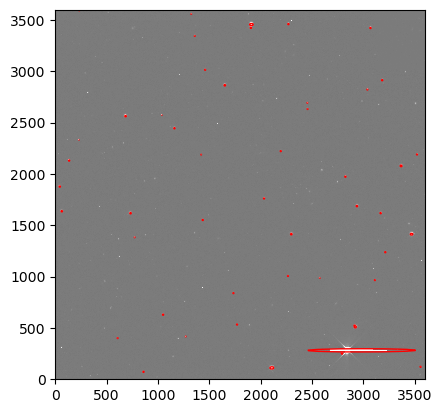

In [151]:
def plot_image():
    """"Plots the image in a modified colour scale with ellipses around detected objects """

    # Plots the image
    fig, ax = plt.subplots()
    m, s = np.mean(data), np.std(data)
    im = ax.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

    # plot an ellipse for each object
    for i in range(len(bkg_image)):
        e = Ellipse(xy=(bkg_image['x'][i], bkg_image['y'][i]),
                    width=5*bkg_image['a'][i],
                    height=5*bkg_image['b'][i],
                    angle=bkg_image['theta'][i] * 180. / np.pi)
        e.set_facecolor('none')
        e.set_edgecolor('red')
        ax.add_artist(e)

    return


plot_image()

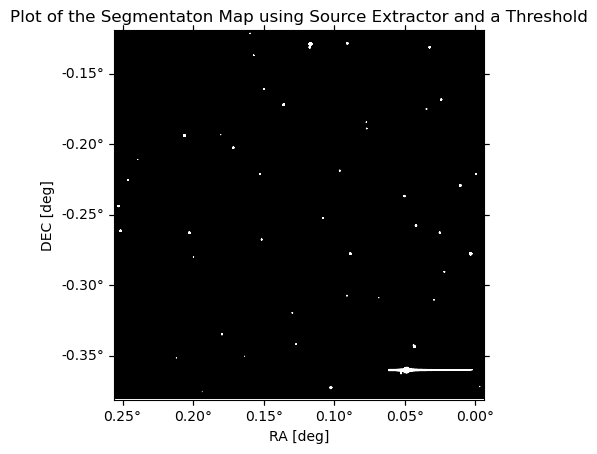

In [210]:
def plot_seg_map():
    """ Plots the segmentation map, given as an output in the source extraction step """
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection=wcs)
    plt.imshow(seg_map, origin='lower', cmap='gray', vmin=0, vmax=1)
    plt.xlabel('RA [deg]')
    plt.ylabel('DEC [deg]')
    plt.title('Plot of the Segmentaton Map using Source Extractor and a Threshold')
    lon = ax.coords[0]
    lat = ax.coords[1]
    lon.set_major_formatter('d.dd')
    lat.set_major_formatter('d.dd')
    return 

plot_seg_map()

In [163]:
query = f"""
    SELECT ra,dec
    FROM ls_dr10.tractor_s
    WHERE ra >= (0) AND ra < (0.5)
    AND dec >= (-4) AND dec < (0)
    AND mag_g > 0 AND brickname='0001m002' AND mag_g<=21
    """
tractor_objs=qc.query(sql=query,fmt="pandas")
tractor_objs

,ra,dec
0,0.026918,-0.364865
1,0.013281,-0.360080
2,0.037058,-0.357003
3,0.047731,-0.361495
4,0.048685,-0.360492
...,...,...
156,0.200938,-0.132477
157,0.239152,-0.211355
158,0.247303,-0.211306
159,0.232754,-0.178004


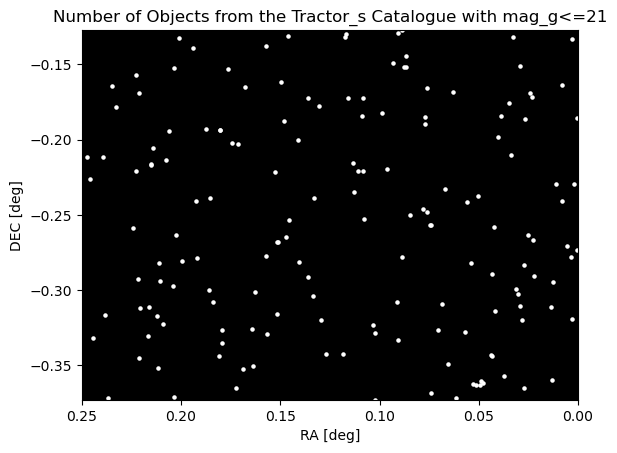

In [218]:
fig,ax= plt.subplots()
ax.set_xlim((0.25,0))
ax.set_ylim((min(tractor_objs['dec']),max(tractor_objs['dec'])))
ax.set_facecolor('k')
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.scatter(tractor_objs['ra'], tractor_objs['dec'], color='w',s=5)
plt.title('Number of Objects from the Tractor_s Catalogue with mag_g<=21')
plt.show()

## FIGURE 4: Histogram of Mask Radius

## FIGURE 5: 0.25*0.25 Grid of SEG Map and Dark Sky Identification

In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits as fits

import pkg_resources
pkg_resources.require("numpy==1.26.3")
import numpy as np

from dl import queryClient as qc
import pandas as pd
from scipy.spatial import distance_matrix

Querying the catalogue for 0.25 degree squares

In [2]:
def query_tractor(ra, dec, dist=1.0):
    """Queries the Astro Data Lab for the ra, dec and mag_g of the objects within a square of side length (dist).     
    dist is in degrees
    """
    # Bounds of the square we are querying objects for
    ra_min=ra
    ra_max = ra + dist
    dec_min=dec
    dec_max = dec + dist

    query = f"""
    SELECT ra, dec, mag_g,mag_r,mag_i,mag_z
    FROM ls_dr10.tractor_s
    WHERE ra >= ({ra_min}) AND ra < ({ra_max})
    AND dec >= ({dec_min}) AND dec < ({dec_max})
    AND (mag_g<=21 AND mag_g>=16
        OR mag_r<=21 AND mag_r>=16
        OR mag_i<=21 AND mag_i>=16
        OR mag_z<=21 AND mag_z>=16)       
    """
    
    # check if this completes successfuly
    brick_info = qc.query(sql=query, fmt="pandas")
    return brick_info

Get Bitmask Info

In [14]:
def load_mask_data(index=0, load_all=False):
    """Load a desired mask data file by index, or just download all five. 
    Returns a pandas Dataframe with columns 'ra', 'dec', 'radius'
    """
    
    # load all
    if load_all:
        all_masks = []
        for i in range(5):
            
            with np.load(f"mask_data_files\mask_data_{i}.npz", mmap_mode='r') as mask_data:
                mask_array = mask_data['arr_0']
                mask_array_byteswap = mask_array.byteswap().newbyteorder()
                masked_stars = pd.DataFrame(mask_array_byteswap)
                all_masks.append(masked_stars)
        return pd.concat(all_masks, ignore_index=True)

    # load single index
    with np.load(f"mask_data_files\mask_data_{index}.npz", mmap_mode='r') as mask_data:
        mask_array = mask_data['arr_0']
        mask_array_byteswap = mask_array.byteswap().newbyteorder()
        masked_stars = pd.DataFrame(mask_array_byteswap)

    return masked_stars

Process Mask and Catalogue Data Together

In [15]:
def mask_radius(mag_g, mask_radius=20):
    return (mask_radius/3600) + 1630./3600. * 1.396**(-mag_g)

In [16]:
# combine mask and star data

def combine_data(masked_stars, catalog_stars, coords, mask_minimum):
    """Combines the data from masked and catalog stars based on some coordinate range"""
    # coords = [ra, ra+map_dist, dec, dec+map_dist]
    
    # cut masked stars to only use the same area as catalog_stars
    masked_box = masked_stars.query('(@coords[0] < ra < @coords[1]) and (@coords[2] < dec < @coords[3])')
    
    # apply buffer radius to mask and star data
    masked_box.loc[:, 'radius'] = masked_box['radius'] + (mask_minimum / 3600.)
    catalog_stars['radius'] = mask_radius(catalog_stars['mag_g'], mask_minimum)
    
    # remove g mag
    catalog_stars = catalog_stars.drop('mag_g', axis=1)
    
    # combine catalog + mask
    all_stars = pd.concat([masked_box, catalog_stars]).reset_index(drop=True)
    return all_stars

In [17]:
def create_pixel_columns(all_stars, coords, dim):
    """Creates columns for min and max ra and dec for all stars in the dataframe"""
    # coords: [ra, ra+map_dist, dec, dec+map_dist]
    
    # find max and min ra/dec corresponding to the mask of star
    all_stars['max_ra'] = all_stars['ra'] + all_stars['radius']
    all_stars['min_ra'] = all_stars['ra'] - all_stars['radius']
    all_stars['max_dec'] = all_stars['dec'] + all_stars['radius']
    all_stars['min_dec'] = all_stars['dec'] - all_stars['radius']
    
    # boolean for radii that go above 1-degree integer RA/DEC bounds
    expression = '(max_ra > ceil(ra)) | (min_ra < floor(ra)) | (max_dec > ceil(dec)) | (min_dec < floor(dec))'
    all_stars['overlap'] = all_stars.eval(expression)
    
    # ra, dec, and radius in pixels
    # TODO check if off by one is needed?
    all_stars['ra_pix'] = np.round((all_stars['ra'] - coords[0]) * dim).astype(int) - 1
    all_stars['dec_pix'] = np.round((all_stars['dec'] - coords[2]) * dim).astype(int) - 1
    all_stars['rad_pix'] = np.ceil(all_stars['radius'] * dim).astype(int)
    
    all_stars['min_ra_pix'] = all_stars['ra_pix'] - all_stars['rad_pix']
    all_stars['max_ra_pix'] = all_stars['ra_pix'] + all_stars['rad_pix']
    all_stars['min_dec_pix'] = all_stars['dec_pix'] - all_stars['rad_pix']
    all_stars['max_dec_pix'] = all_stars['dec_pix'] + all_stars['rad_pix']
    
    # set stars outside of map range to that value
    all_stars.loc[all_stars['min_ra_pix'] < 0, 'min_ra_pix'] = 0
    all_stars.loc[all_stars['max_ra_pix'] > dim, 'max_ra_pix'] = dim
    all_stars.loc[all_stars['min_dec_pix'] < 0, 'min_dec_pix'] = 0
    all_stars.loc[all_stars['max_dec_pix'] > dim, 'max_dec_pix'] = dim
    
    return all_stars

Segementation Map

In [18]:
def seg_map(df:pd.DataFrame, dim):
    """Creates segementation map of shape (`dim`, `dim`) based on the mask locations and pixel data of `df`"""

    array = np.zeros((dim, dim), dtype=int)
    array.flatten()
    
    for star in df.to_dict('records'):
        
        # center pixel to determine distance from
        center = [[star['dec_pix'], star['ra_pix']]]
        
        # make array of indexes
        chunk = np.indices((star['max_dec_pix'] - star['min_dec_pix'], star['max_ra_pix'] - star['min_ra_pix']))
        
        # adjust indices to correspond to the larger grid
        # coord grid is shaped like [ [x1, y1], [x1, y2], ... [x1, yn], [x2, y1], ... [xn, yn] ]
        coord_grid = np.dstack((chunk[0]+star['min_dec_pix'], chunk[1]+star['min_ra_pix']))
        coord_grid = np.concatenate(coord_grid, axis=0)
        
        # calculate distances of each pixel coordinate to the center pixel
        distances = distance_matrix(x=coord_grid, y=center)

        # change all values of the segmap array to 0 where distances are < mask radius
        np.place(array[star['min_dec_pix']:star['max_dec_pix'], star['min_ra_pix']:star['max_ra_pix']], distances < star['rad_pix'], 1)

    array.reshape((dim, dim))
    return array

In [19]:
def define_grid(dim, fov=45):
    gridlines = np.arange(0, dim+1, (fov/3600 * dim))
    return gridlines

In [20]:
def find_dark_regions(array, gridlines):

    # calculating and storing the centre of each dark coord
    centers = []

    for i in range(len(gridlines[:-1])):
        centers.append(int((gridlines[i] + gridlines[i+1])/2 + 0.5))

    x_cen, y_cen = np.meshgrid(centers, centers)

    dark_regions = []

    for i in range(len(gridlines) - 1):
        for j in range(len(gridlines) - 1):
            x_start, x_end = (gridlines[i]).astype(int), (gridlines[i + 1]).astype(int)
            y_start, y_end = (gridlines[j]).astype(int), (gridlines[j + 1]).astype(int)
            
            if np.all(array[y_start:y_end, x_start:x_end] == 0):
                dark_regions.append([x_cen[j, i], y_cen[j, i]])

    dr_trans = np.array(dark_regions).transpose()

    return dr_trans, dark_regions

In [21]:
def create_plot(array, coords, pix_coords, gridlines, dim, dr_trans):

    # Creating exclusion map with grid
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)

    plt.imshow(array, origin = 'lower', cmap='gray', vmin=0, vmax=1)

    positions = np.linspace(0,dim,5)
    x_labels = np.linspace(coords[0],coords[1],5)
    y_labels = np.linspace(coords[2],coords[3],5)

    ax.set_xticks(positions, x_labels)
    ax.set_yticks(positions, y_labels)    

    plt.vlines(gridlines, min(pix_coords[1]), max(pix_coords[1]), color='red', linewidth=1)
    plt.hlines(gridlines, min(pix_coords[0]), max(pix_coords[0]), color= 'red', linewidth=1)

    plt.plot(dr_trans[0], dr_trans[1], 'rx', markersize=10)

    plt.tight_layout()
    plt.margins(0)
    plt.show()

    return

In [22]:
def create_data_frame(dark_regions, coords, dim):
    dark_ra = []
    dark_dec = []

    for i in dark_regions:
        ra = i[0] / (dim) + coords[0]
        dec = i[1] / (dim) + coords[2]
        dark_ra.append(ra)
        dark_dec.append(dec)

    dark_catalogue = pd.DataFrame({'ra':dark_ra, 'dec':dark_dec})
    return dark_catalogue

In [23]:
def generate_dark_sky_catalogue(ra, dec, query_dist=1.0, map_dist=1.0, mask_min_radius=20, fov=45, query_df=None, mask_df=None):
    """Generates a dataframe of RA/DEC pairs corresponding to allowed dark positions
    
    Parameters
    ----------
    ra: `float`
        starting right ascension to query/analyze from (degrees)
    dec: `float`
        starting declination to query/analyze from (degrees)
    query_dist: `float`
        length of one side of the queried square region of sky from starting ra/dec (degrees, default=1)
    map_dist: `float`
        length of one side of the analyzed square region of sky from starting ra/dec (degrees, default=1)
    mask_min_radius: `float`
        minimum masking radius for detected objects (arcseconds, default=20)
    fov: `float`
        minimum spacing between dark sky regions (arcseconds, default=45)
    """
    
    dim = int((3600*4) * map_dist)
    
    # load masked data
    print("Loading masked star data....")
    # masked_stars = load_mask_data(load_all=True)
    masked_stars = mask_df
    
    print(f"Querying the tractor catalog for stars from RA({ra}, {ra+query_dist}) to DEC({dec}, {dec+query_dist})...")
    tractor_df = query_df
    # tractor_df = query_tractor(ra, dec, query_dist)
    
    # concatenate data
    print("Combining mask and queried stars...")
    coords = [ra, ra+map_dist, dec, dec+map_dist]
    all_stars = combine_data(masked_stars, tractor_df, coords, mask_min_radius)

    # return
    print("Calculating pixel values for stars....")
    all_stars = create_pixel_columns(all_stars, coords, dim)

    print("Creating segmentation map...")
    array = seg_map(all_stars, dim, coords)

    print("Defining grid lines...")
    gridlines = define_grid(dim, fov)

    print("Finding dark regions...")
    dr_trans, dark_regions = find_dark_regions(array, gridlines)

    print("Plotting dark regions...")
    pix_coords = [all_stars['ra_pix'], all_stars['dec_pix'], all_stars['rad_pix']]
    create_plot(array, coords, pix_coords, gridlines, dim, dr_trans)

    print("Converting dark regions to coordinates...")
    dark_catalogue = create_data_frame(dark_regions, coords, dim)
    
    print("Done!")

    return dark_catalogue

In [24]:
query_df = query_tractor(3,-4, 1)
mask_df = load_mask_data(load_all=True)

In [25]:
generate_dark_sky_catalogue(3,-4, query_df=query_df, mask_df=mask_df)

Loading masked star data....
Querying the tractor catalog for stars from RA(3, 4.0) to DEC(-4, -3.0)...
Combining mask and queried stars...
Calculating pixel values for stars....


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [266]:
# masking for low magnitude objects
def mask_radius(mag_g, mask_radius=20):
    return (mask_radius/3600) + 1630./3600. * 1.396**(-mag_g)

In [221]:
# masking for low magnitude objects

def mask_radius(tractor_df, fov_radius=20):
    radius = (fov_radius/3600) + 1630./3600. * 1.396**(-tractor_df['mag_g'])
    tractor_df['radius'] = radius
    return tractor_df

In [248]:
def load_mask_data(index=0, load_all=False):
    """Load a desired mask data file by index, or just download all five. 
    Returns a pandas Dataframe with columns 'ra', 'dec', 'radius'
    """
    
    # load all
    if load_all:
        all_masks = []
        for i in range(5):
            
            with np.load(f"mask_data_files\mask_data_{i}.npz", mmap_mode='r') as mask_data:
                mask_array = mask_data['arr_0']
                mask_array_byteswap = mask_array.byteswap().newbyteorder()
                masked_stars = pd.DataFrame(mask_array_byteswap)
                all_masks.append(masked_stars)
        return pd.concat(all_masks, ignore_index=True)

    # load single index
    with np.load(f"mask_data_files\mask_data_{index}.npz", mmap_mode='r') as mask_data:
        mask_array = mask_data['arr_0']
        mask_array_byteswap = mask_array.byteswap().newbyteorder()
        masked_stars = pd.DataFrame(mask_array_byteswap)

    return masked_stars

In [256]:
def full_df(masked_stars, tractor_df, coords):
    one_deg_sq = masked_stars.query(' (ra >' + str(coords[0]) + ') & (ra <' + str(coords[1]) + ') & (dec >' + str(coords[2]) + ') & (dec <' + str(coords[3]) + ')' )
    df = pd.concat([tractor_df,one_deg_sq], axis=0)
    df = df.drop('mag_g', axis=1)
    return df

In [257]:
def seg_map(df, dim, coords):

    array = np.zeros((dim, dim), dtype=int)

    ra_pix = np.round((df['ra'] - coords[0]) * dim).astype(int) - 1
    dec_pix = np.round((df['dec'] - coords[2]) * dim ).astype(int) - 1
    rad_pix = np.ceil(df['radius']*dim).astype(int)

    for y, x, r in zip(ra_pix,dec_pix,rad_pix):
        ra_max = x + r if x+r <= dim else dim
        ra_min = x - r if x-r >= 0 else 0
        dec_max = y + r if y+r <= dim else dim
        dec_min = y - r if y-r >= 0 else 0

        for i in range(ra_min,ra_max):
            for j in range(dec_min,dec_max):
                if ((i-x)**2 + (j-y)**2) <= r**2:
                    array[i,j] = 1

    return array, [ra_pix, dec_pix, rad_pix]

In [258]:
def define_grid(dim, fov=45):
    gridlines = np.arange(0, dim+1, (fov/3600 * dim))
    return gridlines

In [259]:
def find_dark_regions(array, gridlines):

    # calculating and storing the centre of each dark coord
    centers = []

    for i in range(len(gridlines[:-1])):
        centers.append(int((gridlines[i] + gridlines[i+1])/2 + 0.5))

    x_cen, y_cen = np.meshgrid(centers, centers)

    dark_regions = []

    for i in range(len(gridlines) - 1):
        for j in range(len(gridlines) - 1):
            x_start, x_end = (gridlines[i]).astype(int), (gridlines[i + 1]).astype(int)
            y_start, y_end = (gridlines[j]).astype(int), (gridlines[j + 1]).astype(int)
            
            if np.all(array[y_start:y_end, x_start:x_end] == 0):
                dark_regions.append([x_cen[j, i], y_cen[j, i]])

    dr_trans = np.array(dark_regions).transpose()

    return dr_trans, dark_regions

In [260]:
def create_plot(array, coords, pix_coords, gridlines, dim, dr_trans):

    # Creating exclusion map with grid
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)

    plt.imshow(array, origin = 'lower', cmap='gray', vmin=0, vmax=1)

    positions = np.linspace(0,dim,5)
    x_labels = np.linspace(coords[0],coords[1],5)
    y_labels = np.linspace(coords[2],coords[3],5)

    ax.set_xticks(positions, x_labels)
    ax.set_yticks(positions, y_labels)    

    plt.vlines(gridlines, min(pix_coords[1]), max(pix_coords[1]), color='red', linewidth=1)
    plt.hlines(gridlines, min(pix_coords[0]), max(pix_coords[0]), color= 'red', linewidth=1)

    plt.plot(dr_trans[0], dr_trans[1], 'rx', markersize=10)

    plt.tight_layout()
    plt.margins(0)
    plt.show()

    return

In [261]:
def create_data_frame(dark_regions, coords, dim):
    dark_ra = []
    dark_dec = []

    for i in dark_regions:
        ra = i[0] / (dim) + coords[0]
        dec = i[1] / (dim) + coords[2]
        dark_ra.append(ra)
        dark_dec.append(dec)

    dark_catalogue = pd.DataFrame({'ra':dark_ra, 'dec':dark_dec})
    return dark_catalogue

In [262]:
def generate_dark_sky_catalogue(ra, dec, dist=1.0, fov_radius=20, masked_stars=load_mask_data(index=0,load_all=True), fov=45):
    
    dim = int((3600*4) * dist)
    
    tractor_df, coords = query_tractor(ra, dec, dist)

    tractor_df = mask_radius(tractor_df, fov_radius)
    
    df = full_df(masked_stars, tractor_df, coords)

    array, pix_coords = seg_map(df, dim, coords)

    gridlines = define_grid(dim, fov)

    dr_trans, dark_regions = find_dark_regions(array, gridlines)

    #create_plot(array, coords, pix_coords, gridlines, dim, dr_trans)

    dark_catalogue = create_data_frame(dark_regions, coords, dim)

    return dark_catalogue

In [263]:
generate_dark_sky_catalogue(0,0)

,ra,dec
0,0.00625,0.00625
1,0.00625,0.04375
2,0.00625,0.13125
3,0.00625,0.14375
4,0.00625,0.15625
...,...,...
1090,0.99375,0.81875
1091,0.99375,0.83125
1092,0.99375,0.84375
1093,0.99375,0.91875


In [2]:
# get all the brick names and ra/dec of every brick below a declination of 30
# with at least 1 observation in the g filter
# this takes about 15 seconds to get ~337k brick names

query = f"""
        SELECT brickname, ra, ra1, ra2, dec, dec1, dec2
        FROM ls_dr10.bricks_s
        WHERE dec <= 30 AND nexp_g >= 1
        """

brick_df = qc.query(sql=query, fmt="pandas")
brick_df

,brickname,ra,ra1,ra2,dec,dec1,dec2
0,0900m897,90.000,72.000,108.000,-89.75,-89.875,-89.625
1,0112m895,11.250,0.000,22.500,-89.50,-89.625,-89.375
2,0337m895,33.750,22.500,45.000,-89.50,-89.625,-89.375
3,0562m895,56.250,45.000,67.500,-89.50,-89.625,-89.375
4,0787m895,78.750,67.500,90.000,-89.50,-89.625,-89.375
...,...,...,...,...,...,...,...
337218,3587p300,358.704,358.560,358.848,30.00,29.875,30.125
337219,3589p300,358.992,358.848,359.136,30.00,29.875,30.125
337220,3592p300,359.280,359.136,359.424,30.00,29.875,30.125
337221,3595p300,359.568,359.424,359.712,30.00,29.875,30.125


In [10]:
# get all the brick names and ra/dec of every brick below a declination of 30
# with NO observations in the g filter
# ~5s for 16k bricks
##AND nexp_g < 1

query = f"""
        SELECT brickname, ra, ra1, ra2, dec, dec1, dec2, nexp_g, nexp_i, nexp_r, nexp_z, wise_nobs_1, wise_nobs_2, wise_nobs_3, wise_nobs_4
        FROM ls_dr10.bricks_s
        WHERE dec <= 30
        """

non_g_bricks = qc.query(sql=query, fmt="pandas")
non_g_bricks

,brickname,ra,ra1,ra2,dec,dec1,dec2,nexp_g,nexp_i,nexp_r,nexp_z,wise_nobs_1,wise_nobs_2,wise_nobs_3,wise_nobs_4
0,0180m897,18.000,0.000,36.000,-89.75,-89.875,-89.625,0,0,0,0,483,485,23,23
1,0540m897,54.000,36.000,72.000,-89.75,-89.875,-89.625,0,0,0,0,490,492,22,23
2,0900m897,90.000,72.000,108.000,-89.75,-89.875,-89.625,1,0,1,0,488,494,22,23
3,1260m897,126.000,108.000,144.000,-89.75,-89.875,-89.625,0,0,0,0,486,495,25,25
4,1620m897,162.000,144.000,180.000,-89.75,-89.875,-89.625,0,0,0,0,455,469,23,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353107,3587p300,358.704,358.560,358.848,30.00,29.875,30.125,3,0,4,6,243,239,19,19
353108,3589p300,358.992,358.848,359.136,30.00,29.875,30.125,3,0,4,5,239,236,23,23
353109,3592p300,359.280,359.136,359.424,30.00,29.875,30.125,3,0,3,4,238,238,23,24
353110,3595p300,359.568,359.424,359.712,30.00,29.875,30.125,3,0,3,4,244,244,22,22


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


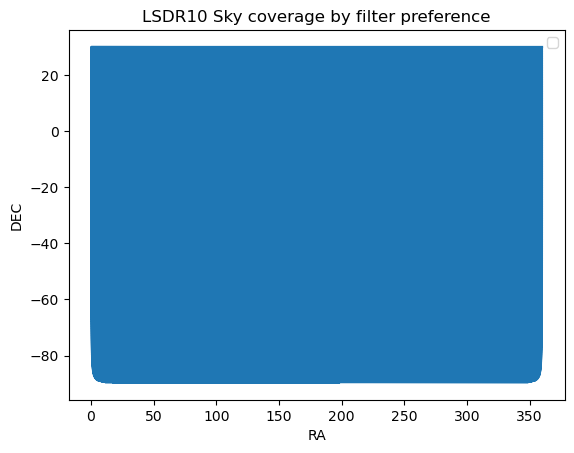

In [11]:
fig, ax = plt.subplots(1,1)
ax.plot(non_g_bricks['ra'], non_g_bricks['dec'])
        # 'g.', label="g band")
# ax.plot(non_g_bricks['ra'], non_g_bricks['dec'], 'b.', label="non g band")
#ax.plot(r_bricks['ra'], r_bricks['dec'], 'r.', label="r band")
#ax.plot(i_bricks['ra'], i_bricks['dec'], 'm.', label="i band")
#ax.plot(z_bricks['ra'], z_bricks['dec'], 'k.', label="z band")
#ax.plot(wise_only['ra'], wise_only['dec'], 'b.', label="WISE only")



ax.set(title="LSDR10 Sky coverage by filter preference", xlabel="RA", ylabel="DEC")
ax.legend()
plt.show()

Almost all of the DR10 bricks have at least one g-band observation associated with them, and those that don't are mostly along the edge of the Milky Way plane and the Magellanic Clouds. Out of the ~16k bricks that aren't accounted for in the g-band, only about 2900 only have WISE (W1, W2, W3, W4) observations that would require different calibration and image processing to handle.

In [115]:
# bricks with r band observations
r_bricks = non_g_bricks[non_g_bricks['nexp_r']!=0]
# no r band, but i band
i_bricks = non_g_bricks[(non_g_bricks['nexp_r']==0) & (non_g_bricks['nexp_i']!=0)]
# no r or i bands, but z band
z_bricks = non_g_bricks[(non_g_bricks['nexp_r']==0) & (non_g_bricks['nexp_i']==0) & (non_g_bricks['nexp_z']!=0)]
# no r, i, or z
wise_only = non_g_bricks[(non_g_bricks['nexp_r']==0) & (non_g_bricks['nexp_i']==0) & (non_g_bricks['nexp_z']==0)]
wise_only

,brickname,ra,ra1,ra2,dec,dec1,dec2,nexp_g,nexp_i,nexp_r,nexp_z,wise_nobs_1,wise_nobs_2,wise_nobs_3,wise_nobs_4
0,0180m897,18.000000,0.000000,36.000000,-89.75,-89.875,-89.625,0,0,0,0,483,485,23,23
1,0540m897,54.000000,36.000000,72.000000,-89.75,-89.875,-89.625,0,0,0,0,490,492,22,23
2,1260m897,126.000000,108.000000,144.000000,-89.75,-89.875,-89.625,0,0,0,0,486,495,25,25
3,1620m897,162.000000,144.000000,180.000000,-89.75,-89.875,-89.625,0,0,0,0,455,469,23,23
4,1980m897,198.000000,180.000000,216.000000,-89.75,-89.875,-89.625,0,0,0,0,459,471,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15854,0380p297,38.099042,37.955272,38.242812,29.75,29.625,29.875,0,0,0,0,217,209,24,13
15855,1019p297,101.932907,101.789137,102.076677,29.75,29.625,29.875,0,0,0,0,209,204,12,12
15874,2783p300,278.352000,278.208000,278.496000,30.00,29.875,30.125,0,0,0,0,316,318,22,22
15875,2786p300,278.640000,278.496000,278.784000,30.00,29.875,30.125,0,0,0,0,304,305,20,20


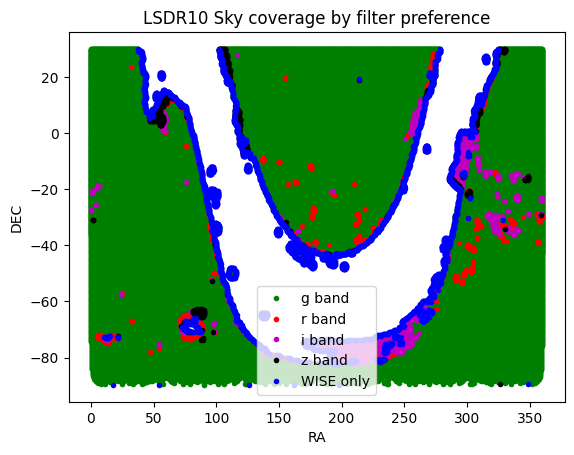

In [114]:
fig, ax = plt.subplots(1,1)
ax.plot(brick_df['ra'], brick_df['dec'], 'g.', label="g band")
# ax.plot(non_g_bricks['ra'], non_g_bricks['dec'], 'b.', label="non g band")
ax.plot(r_bricks['ra'], r_bricks['dec'], 'r.', label="r band")
ax.plot(i_bricks['ra'], i_bricks['dec'], 'm.', label="i band")
ax.plot(z_bricks['ra'], z_bricks['dec'], 'k.', label="z band")
ax.plot(wise_only['ra'], wise_only['dec'], 'b.', label="WISE only")


ax.set(title="LSDR10 Sky coverage by filter preference", xlabel="RA", ylabel="DEC")
ax.legend()
plt.show()

All bricks in the `brick_df` dataframe will have an associated g-band FITS image that can be downloaded from the DR10 website.

Clearing download cache...


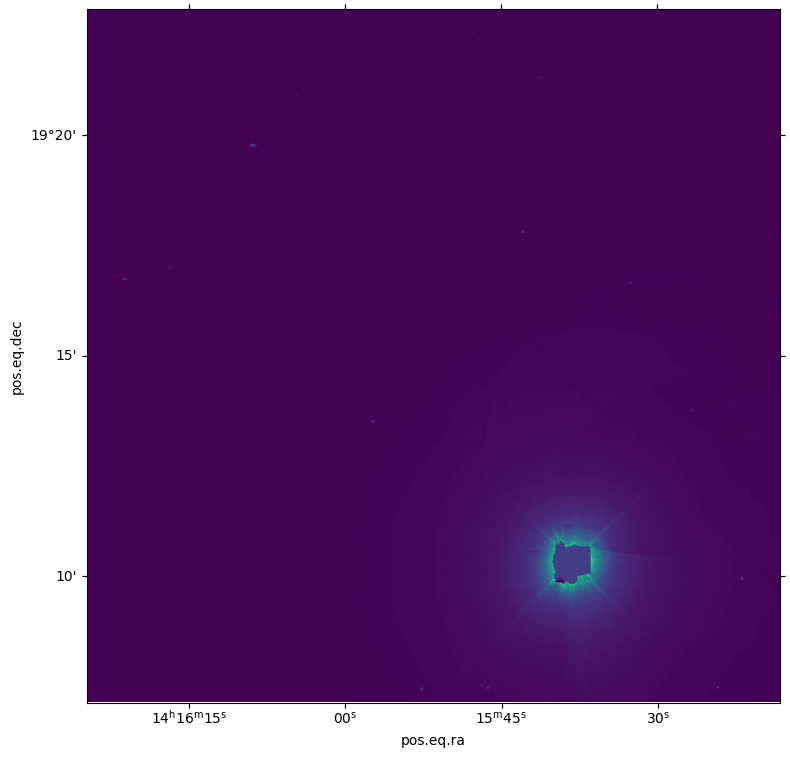

In [116]:
arcturus = "2139p192"
arc_head, arc_data = obtain_image(arcturus, "g", reset_cache=False)
plot_image(arc_head, arc_data)


In [60]:
def iterate_bricks(brick_df):
    """Iterate through a dataframe of brick names and generate the images from them
    """
    
    image_array = []
    
    for brick in brick_df['brickname']:
        print(brick)
        head, data = obtain_image(brick, "g")
        image_array.append((head, data))  
    
    return image_array
        
image_array = iterate_bricks(brick_df)

0900m897
Clearing download cache...
0112m895
Clearing download cache...
0337m895
Clearing download cache...
0562m895
Clearing download cache...
0787m895
Clearing download cache...
1012m895
Clearing download cache...
1237m895
Clearing download cache...
1462m895
Clearing download cache...
1687m895
Clearing download cache...
1912m895
Clearing download cache...


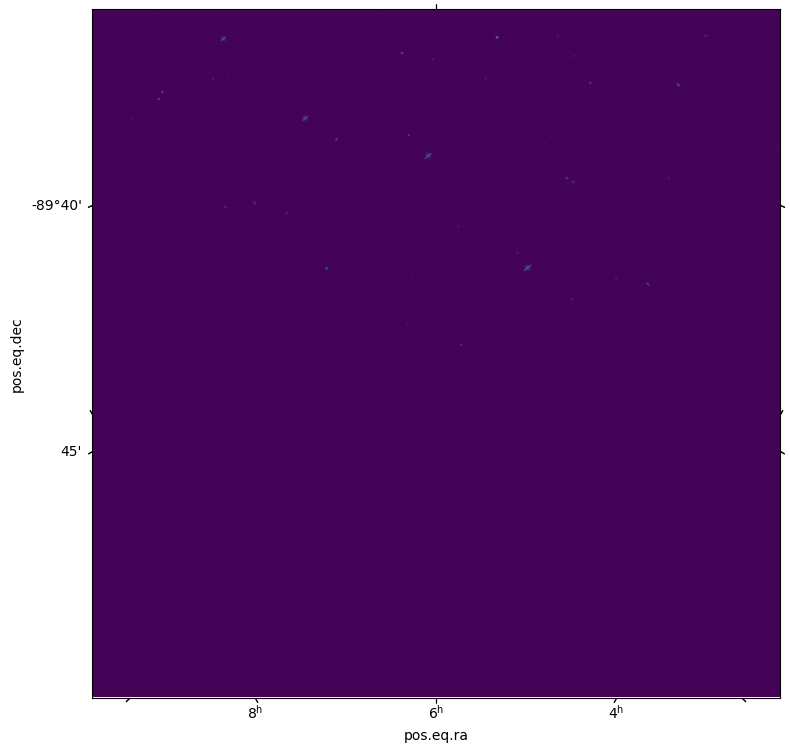

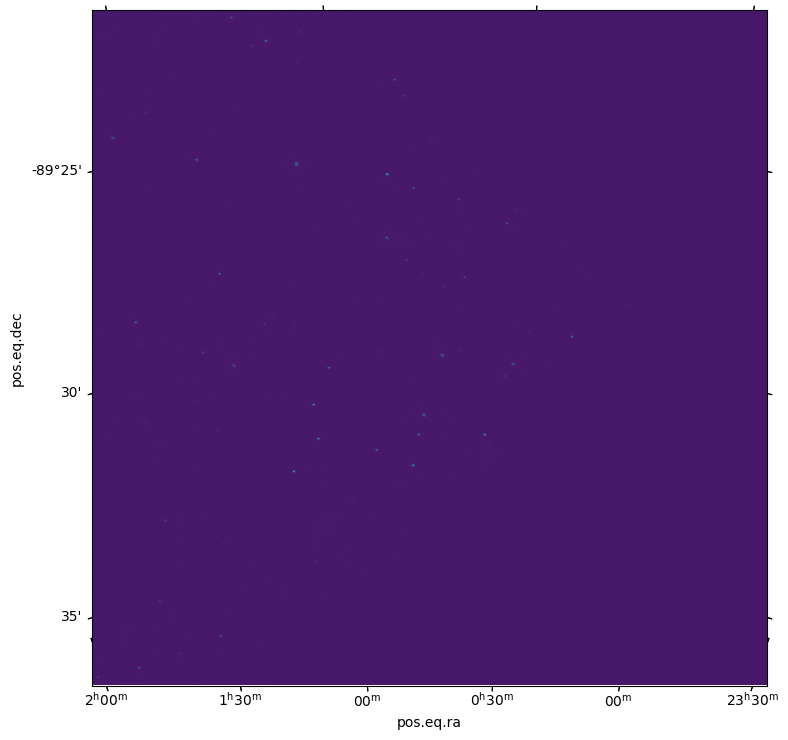

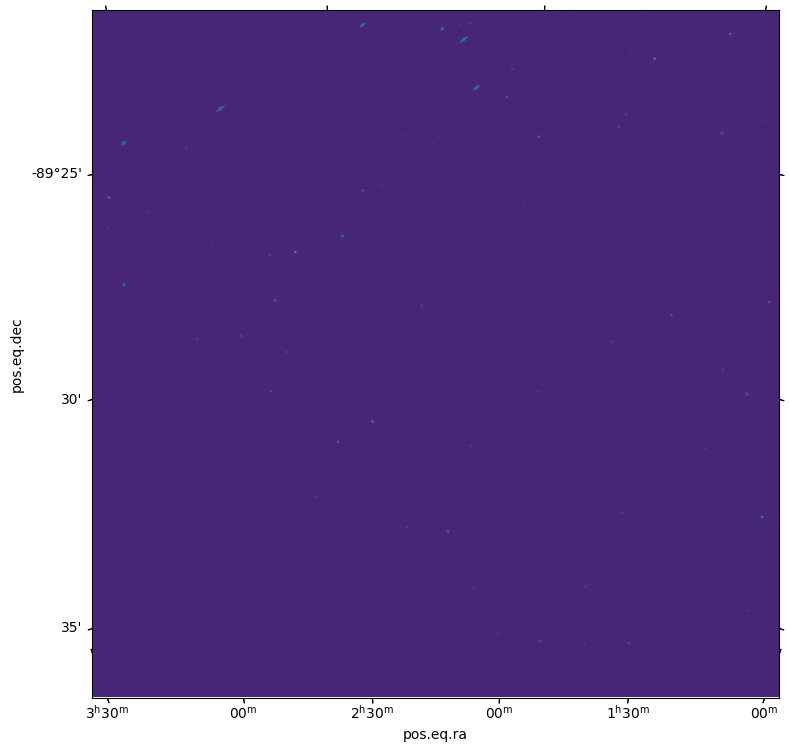

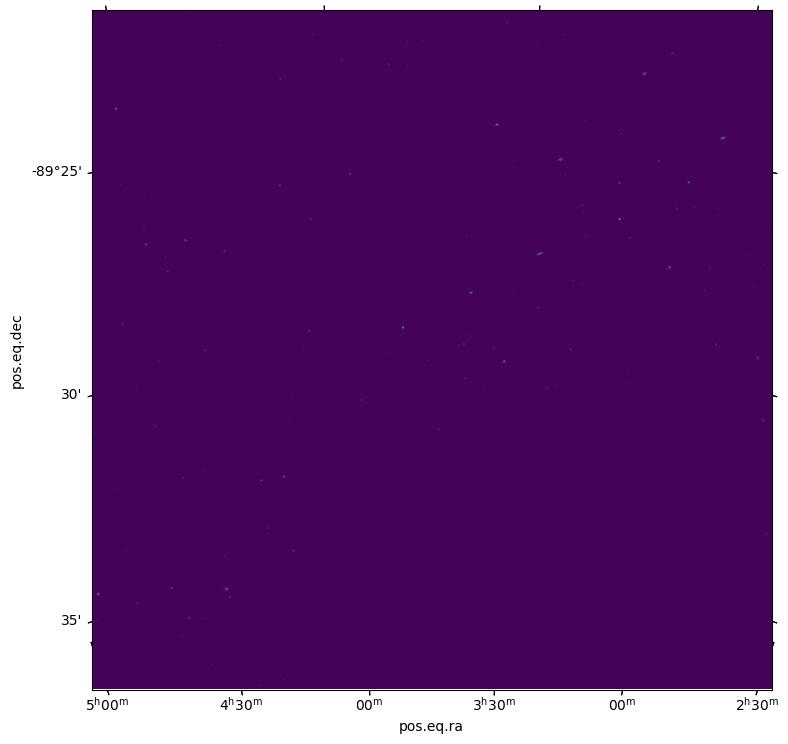

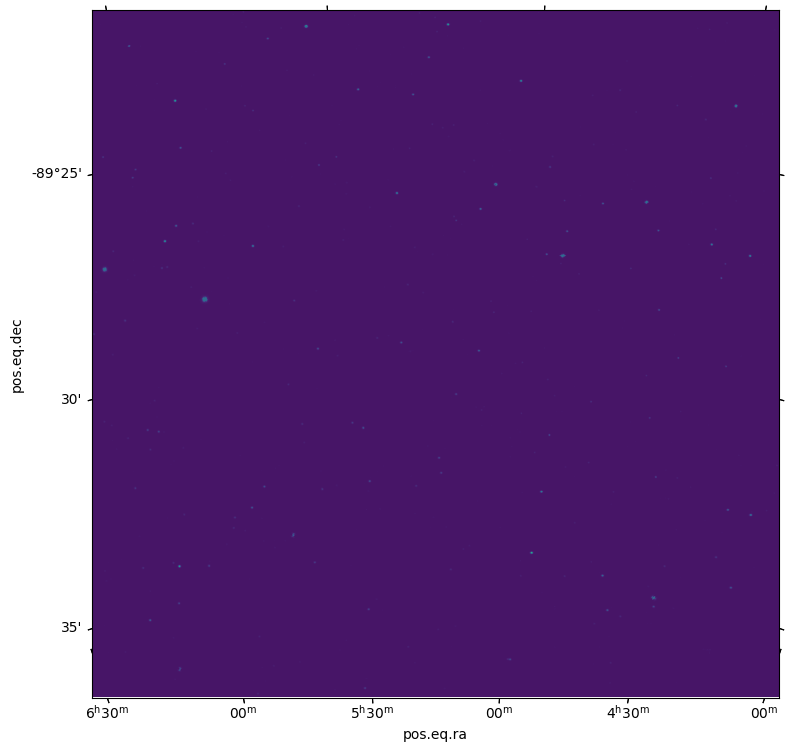

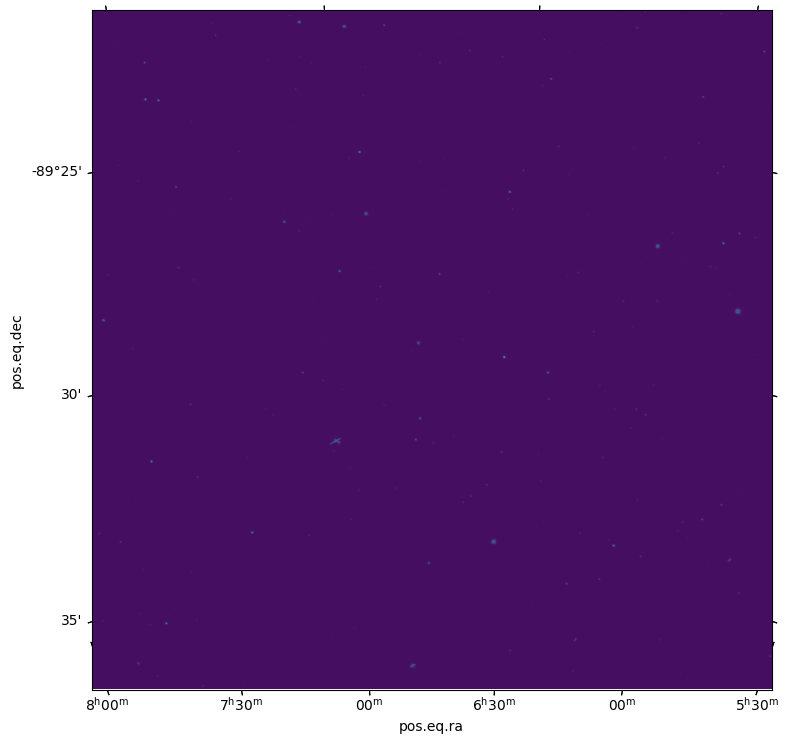

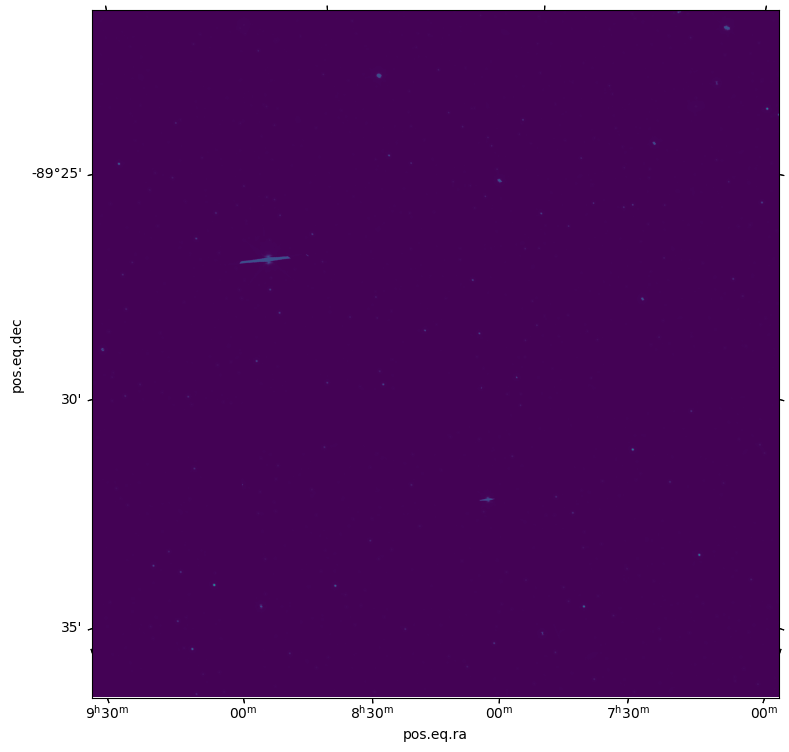

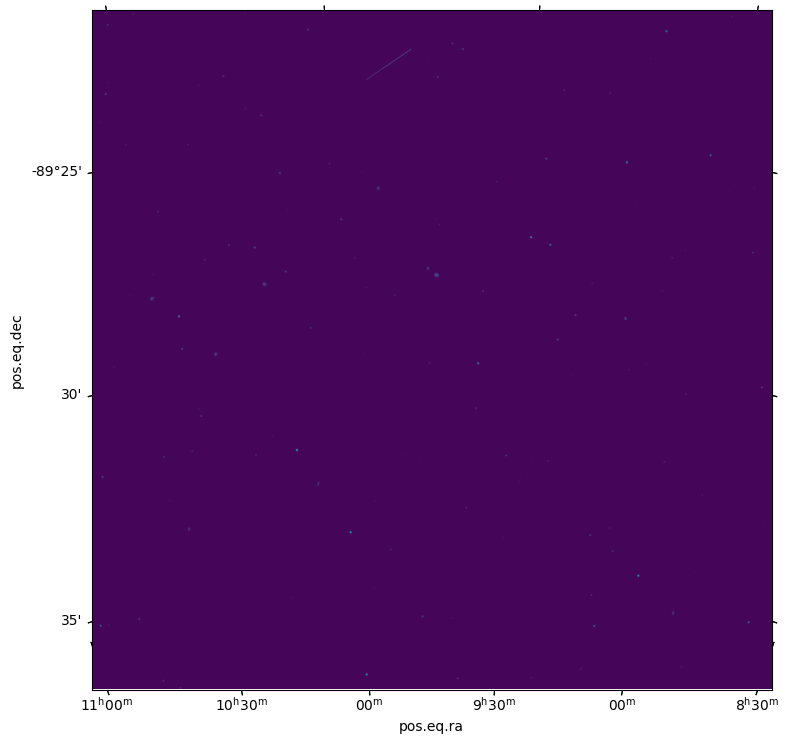

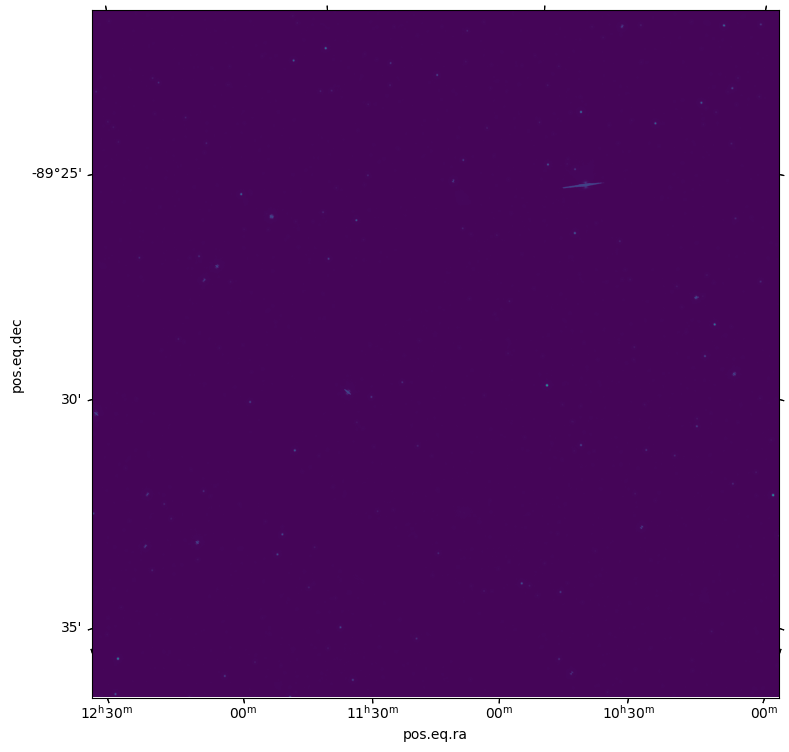

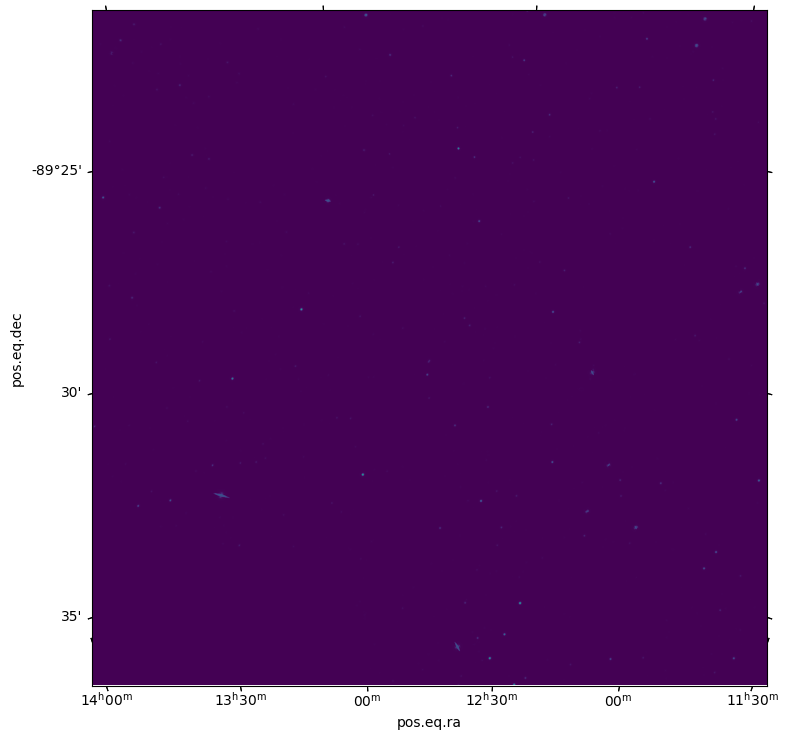

In [61]:
for image in image_array:
    plot_image(image[0], image[1])